In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/INF2178")

Mounted at /content/drive


In [ ]:
### ZONGLIN LI
### 1004910117

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
df = pd.read_csv('INF2178_A3_data.csv')

In [5]:
# observe data
df.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200,1.895165
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061,0.822692
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000,1.000000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000,1.000000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,2.000000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000,3.000000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000,3.000000


In [6]:
#show first 5 row of df
df.head(5)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [7]:
#observe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


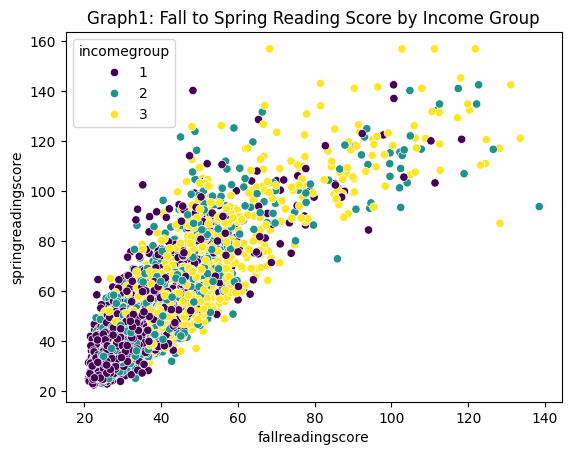

In [ ]:
# Scatter plot to show the relationship between 'fallreadingscore' and 'springreadingscore', colored by 'incomegroup'
sns.scatterplot(data=df, x="fallreadingscore", y="springreadingscore", hue="incomegroup", palette="viridis")
plt.title('Graph1: Fall to Spring Reading Score by Income Group')
plt.show()

<ipython-input-34-873cbd6b5736>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="incomegroup", y="springreadingscore", palette="viridis")


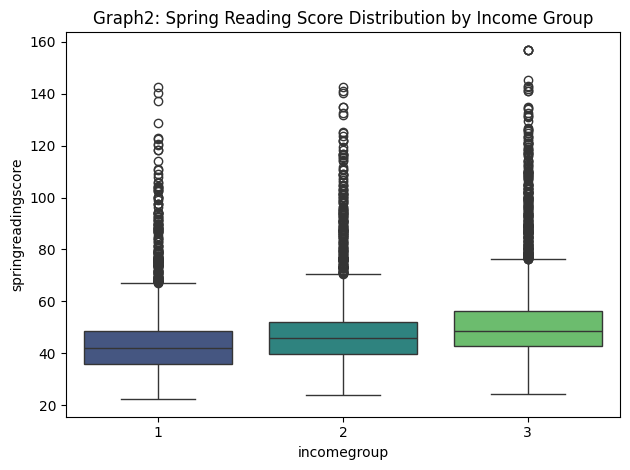

In [ ]:
# Box plot to show the distribution of 'springreadingscore' across 'incomegroup'
sns.boxplot(data=df, x="incomegroup", y="springreadingscore", palette="viridis")
plt.title('Graph2: Spring Reading Score Distribution by Income Group')
plt.tight_layout()
plt.show()

<ipython-input-36-d709f4eceb39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="incomegroup", y="springmathscore", palette="viridis")


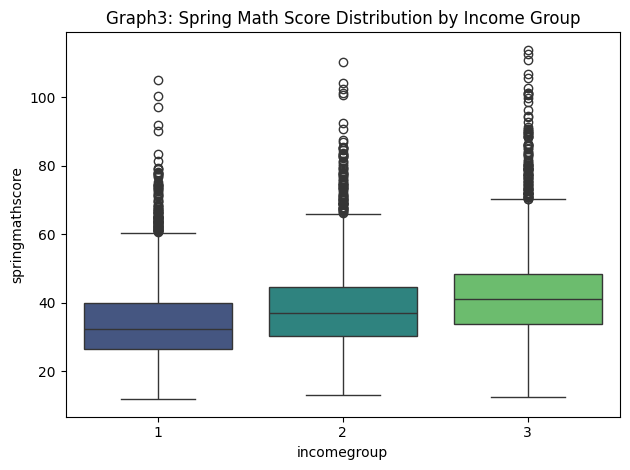

In [ ]:
# Box plot to show the distribution of 'springmathscore' across 'incomegroup'
sns.boxplot(data=df, x="incomegroup", y="springmathscore", palette="viridis")
plt.title('Graph3: Spring Math Score Distribution by Income Group')
plt.tight_layout()
plt.show()

<ipython-input-35-68fb8080586a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="incomegroup", y="springgeneralknowledgescore", palette="viridis")


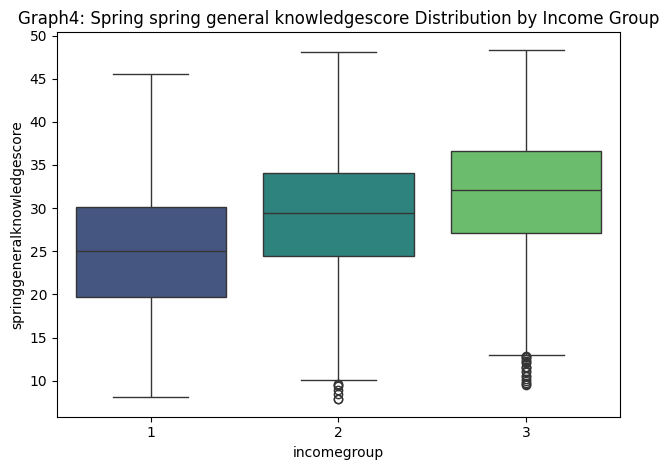

In [ ]:

# Box plot to show the distribution of 'spring general knowledge score' across 'incomegroup'
sns.boxplot(data=df, x="incomegroup", y="springgeneralknowledgescore", palette="viridis")
plt.title('Graph4: Spring spring general knowledgescore Distribution by Income Group')
plt.tight_layout()
plt.show()

In [ ]:
# ANCOVA for spring reading scores
model = ols('springreadingscore ~ C(incomegroup) + fallreadingscore', data=df).fit()

# Print the summary of the model
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:     springreadingscore   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     8929.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:43:04   Log-Likelihood:                -41675.
No. Observations:               11933   AIC:                         8.336e+04
Df Residuals:                   11929   BIC:                         8.339e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5430    

In [ ]:
# ANCOVA for spring math scores
math_model = ols('springmathscore ~ C(incomegroup) + fallmathscore', data=df).fit()

# Print the summary of the math model
print(math_model.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8469.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:46:03   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.2011    

In [ ]:
# ANCOVA for spring general knowledge scores
general_knowledge_model = ols('springgeneralknowledgescore ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()

# Print the summary of the general knowledge model
print(general_knowledge_model.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.731
Model:                                     OLS   Adj. R-squared:                  0.731
Method:                          Least Squares   F-statistic:                 1.082e+04
Date:                         Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                                 13:46:21   Log-Likelihood:                -33259.
No. Observations:                        11933   AIC:                         6.653e+04
Df Residuals:                            11929   BIC:                         6.656e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------